# **4.3 Least Square Approximations**

- When $Ax = b$ has no solution, multiply by $A^T$ and solve  
$$
A^T A \hat{x} = A^T b
$$

### **Minimizing the Error**

- **Question:** How do we make the error $e = b - Ax$ as small as possible?
  - **Geometry:** The best $\hat{x}$ can be found by geometry — the error $e$ meets the column space of $A$ at $90^\circ$.
  - **Algebra:** Solve $A^T A \hat{x} = A^T b$.
  - **Calculus:** The derivative of the error $\|Ax-b\|^2$ is zero at $\hat{x}$.

- The solution to $A\hat{x} = p$ leaves the least possible error $e$.  
$$
\|Ax - b\|^2 = \|Ax - p\|^2 + \|e\|^2
$$

- The partial derivatives of $\|Ax-b\|^2$ are zero when $A^T A \hat{x} = A^T b$.

### **The Big Picture for Least Squares**

- There are no exact solutions to $Ax = b$. Instead of splitting $x$, we split $b = p + e$.

In [3]:
import numpy as np

def least_squares_error(A, b):
    # Compute projection onto Col(A)
    P = A @ np.linalg.inv(A.T @ A) @ A.T
    # Compute minimum-error residual
    e = b - P @ b
    return e, np.linalg.norm(e), np.linalg.norm(e)**2


A = np.array([
    [1, 2],
    [2, 1],
    [3, 4]
], dtype=float)

b = np.array([3, 1, 2], dtype=float)

e_vec, e_norm, e_norm_sq = least_squares_error(A, b)

print("Residual vector e:", e_vec)
print("Minimum error ||e||:", e_norm)
print("Minimum squared error ||e||^2:", e_norm_sq)

C: 1.200000000000001
D: 0.5999999999999999
predictions: [1.2 1.8 2.4 3.  3.6]
residuals: [-0.2  0.2 -0.4  1.  -0.6]


### **Fitting a Straight Line**

- Fitting a line is the clearest application of least squares. For $m>2$ points $(t_1, b_1), \dots, (t_m, b_m)$, the best line $C + Dt$ minimizes vertical distances $e_1, \dots, e_m$:  
$$
E = e_1^2 + \dots + e_m^2
$$

- A line goes through all points when we exactly solve $Ax = b$. Generally, we can't do this.  
  Two unknowns $C$ and $D$ determine a line, so $A$ has only $n = 2$ columns. To fit $m$ points, we try to solve $m$ equations (and only have 2 unknowns!):

$$
Ax = b, \quad 
A = 
\begin{bmatrix}
1 & t_1 \\
1 & t_2 \\
\vdots & \vdots \\
1 & t_m
\end{bmatrix}, \quad 
b = 
\begin{bmatrix}
b_1 \\ b_2 \\ \vdots \\ b_m
\end{bmatrix}
$$

- The column space is usually thin, so $b$ is generally outside of it. When $b$ lies in the column space, $b = p$ and $e = 0$.  

- The closest line $C + Dt$ has heights $p_1, \dots, p_m$ with errors $e_1, \dots, e_m$. Solve  
$$
A^T A \hat{x} = A^T b, \quad \hat{x} = (C, D)
$$  
The errors: $e_i = b_i - C - Dt_i$

- Normal equations explicitly:  
$$
A^T A = 
\begin{bmatrix}
1 & \dots & 1 \\
t_1 & \dots & t_m
\end{bmatrix} 
\begin{bmatrix}
1 & t_1 \\ \vdots & \vdots \\ 1 & t_m
\end{bmatrix} 
= 
\begin{bmatrix}
m & \sum t_i \\
\sum t_i & \sum t_i^2
\end{bmatrix}
$$

$$
A^T b = 
\begin{bmatrix}
1 & \dots & 1 \\
t_1 & \dots & t_m
\end{bmatrix} 
\begin{bmatrix}
b_1 \\ \vdots \\ b_m
\end{bmatrix} 
= 
\begin{bmatrix}
\sum b_i \\ \sum t_i b_i
\end{bmatrix}
$$

- Solve for $\hat{x} = (C, D)$ using  
$$
\hat{x} = (A^T A)^{-1} A^T b
$$

- The vertical errors (residuals) $e = b - A \hat{x}$ are perpendicular to the columns of $A$ (geometry) and lie in the nullspace of $A^T$ (linear algebra). The best $\hat{x} = (C, D)$ minimizes the total squared error:  
$$
E(x) = \|Ax - b\|^2 = (C + Dt_1 - b_1)^2 + \dots + (C + Dt_m - b_m)^2
$$

In [4]:
import numpy as np

def fit_straight_line(t, b):
    """
    Fit b ≈ C + D t using least squares.
    
    Inputs:
        t: shape (m,)   -> t_1, ..., t_m
        b: shape (m,)   -> b_1, ..., b_m

    Returns:
        C, D: best-fit parameters
        p: predicted values A x_hat
        e: residual vector b - p
    """
    t = np.asarray(t, dtype=float)
    b = np.asarray(b, dtype=float)
    m = len(t)

    # Build A matrix
    A = np.column_stack([np.ones(m), t])  # shape (m, 2)

    # Solve normal equations x_hat = (C, D)
    x_hat = np.linalg.inv(A.T @ A) @ (A.T @ b)
    C, D = x_hat

    # Predictions and residuals
    p = A @ x_hat
    e = b - p

    return C, D, p, e

t = np.array([0, 1, 2, 3, 4])
b = np.array([1, 2, 2, 4, 3])

C, D, p, e = fit_straight_line(t, b)

print("C:", C)
print("D:", D)
print("predictions:", p)
print("residuals:", e)

C: 1.200000000000001
D: 0.5999999999999999
predictions: [1.2 1.8 2.4 3.  3.6]
residuals: [-0.2  0.2 -0.4  1.  -0.6]


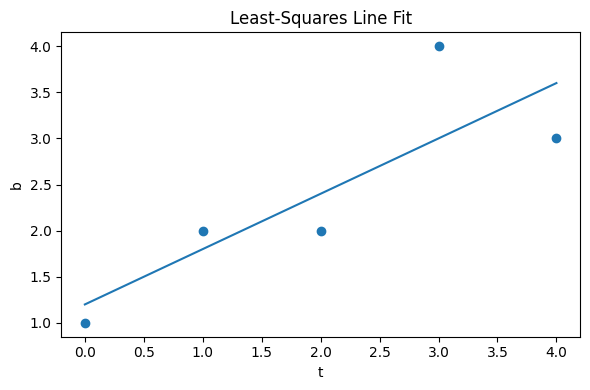

In [6]:
import matplotlib.pyplot as plt

# visualization
plt.figure(figsize=(6,4))
plt.scatter(t, b)
plt.plot(t, p)
plt.xlabel("t")
plt.ylabel("b")
plt.title("Least-Squares Line Fit")
plt.tight_layout()
plt.show()

**Key Ideas**

1. The least squares solution $\hat{x}$ minimizes  
$$
\|Ax-b\|^2 = x^T A^T A x - 2 x^T A^T b + b^T b
$$  
This is the sum of squares of errors for $m$ equations ($m>n$).

2. The best $\hat{x}$ comes from the normal equation $A^T A \hat{x} = A^T b$.

3. To fit $m$ points by a line $b = C + Dt$, the normal equations give $C$ and $D$.

4. Heights of the best line: $p = (p_1, \dots, p_m)$. Errors: $e = (e_1, \dots, e_m)$. Key equation:  
$$
A^T e = 0
$$

5. To fit $m$ points by a combination of $n < m$ functions, $Ax = b$ is generally unsolvable. The least squares solution comes from  
$$
A^T A \hat{x} = A^T b
$$  
yielding the combination with smallest mean squared error (MSE).
